In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
df = pd.read_csv('/content/drive/MyDrive/Ai/Section1/Project/vgames2.csv', index_col=0)

Name : 게임의 이름입니다.  
Platform : 게임이 지원되는 플랫폼의 이름입니다.  
Year : 게임이 출시된 연도입니다.  
Genre : 게임의 장르입니다.  
Publisher : 게임을 배급한 회사입니다.  
NA_Sales : 북미지역에서의 출고량입니다.  
EU_Sales : 유럽지역에서의 출고량입니다.  
JP_Sales : 일본지역에서의 출고량입니다.  
Other_Sales : 기타지역에서의 출고량입니다.  

In [301]:
df.duplicated().sum()
df = df.drop_duplicates() # 중복값 확인과 제거
df.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16593,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16594,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16595,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [53]:
df.info() # 데이터 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  object 
 6   EU_Sales     16597 non-null  object 
 7   JP_Sales     16597 non-null  object 
 8   Other_Sales  16597 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [54]:
df.isnull().sum() # 결측치 확인

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [302]:
# 결측치 대체 장르는 Misc로 바꾸기
df['Year'].fillna(0, inplace=True)
df['Genre'].fillna('Misc', inplace=True)
df['Publisher'].fillna('None', inplace=True)

In [303]:
# 각각 칼럼의 데이터 타입 변환
df = df.astype({'Year':'int'})
df = df.astype({'Platform':'category'})
df = df.astype({'Genre':'category'})

In [304]:
df = df[df['Year'] > 1900] # 연도 이상치,결측치 제거

In [329]:
# sales 단위 맞추기 위한 작업

df['NA_Sales'] = df['NA_Sales'].str.replace('K','000') # K를 000으로 변환
df['NA_Sales'] = df['NA_Sales'].str.replace('M','') # M제거
df['NA_Sales'] = df['NA_Sales'].astype('float') # float로 변환

df['EU_Sales'] = df['EU_Sales'].str.replace('K','000')
df['EU_Sales'] = df['EU_Sales'].str.replace('M','')
df['EU_Sales'] = df['EU_Sales'].astype('float')

df['JP_Sales'] = df['JP_Sales'].str.replace('K','000') 
df['JP_Sales'] = df['JP_Sales'].str.replace('M','')
df['JP_Sales'] = df['JP_Sales'].astype('float')

df['Other_Sales'] = df['Other_Sales'].str.replace('K','000')
df['Other_Sales'] = df['Other_Sales'].str.replace('M','')
df['Other_Sales'] = df['Other_Sales'].astype('float')

AttributeError: ignored

In [330]:
# x의 값이 1000보다 클때 10000으로 나눈다
# 단위가 다른 sales의 단위 맞추기

def test(x):
  if x > 1000:
    return x / 10000
  else:
    return x
df['NA_Sales'] = df['NA_Sales'].apply(test)
df['EU_Sales'] = df['EU_Sales'].apply(test)
df['JP_Sales'] = df['JP_Sales'].apply(test)
df['Other_Sales'] = df['Other_Sales'].apply(test)

In [307]:
df['All_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] # 총합량 칼럼 추가

In [374]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


연도별 총 출고량을 장르별로 하나씩 살펴보기  
그 과정에서 필요한 시각화

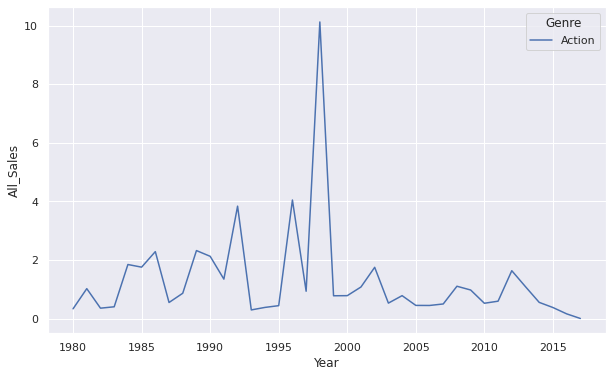

In [216]:
fig = plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.lineplot(data=df, x='Year', y='All_Sales', ci=None,
             hue='Genre', hue_order=['Action'])
plt.show()

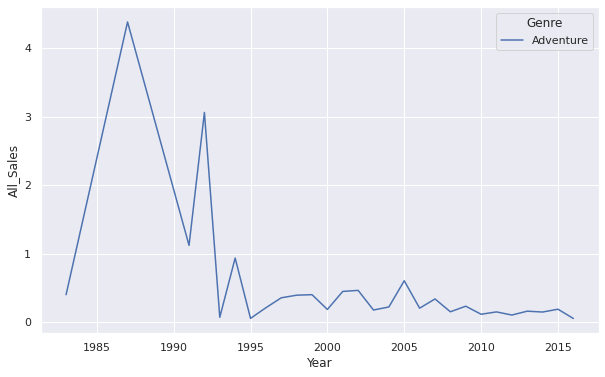

In [217]:
fig = plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.lineplot(data=df, x='Year', y='All_Sales', ci=None,
             hue='Genre', hue_order=['Adventure'])
plt.show()

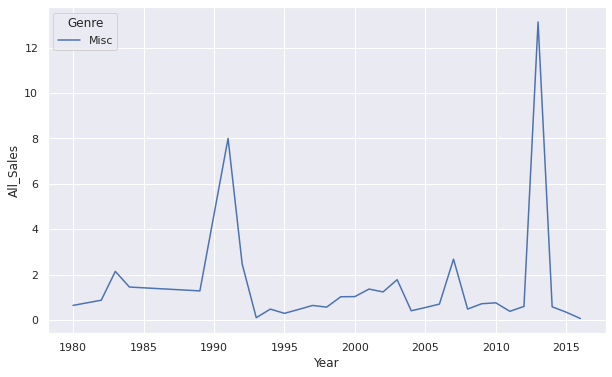

In [308]:
fig = plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.lineplot(data=df, x='Year', y='All_Sales', ci=None,
             hue='Genre', hue_order=['Misc'])
plt.show()

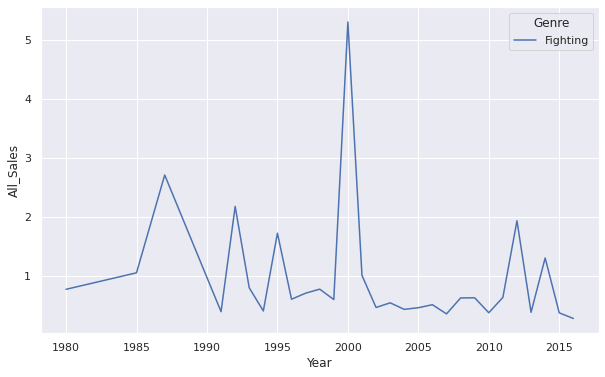

In [220]:
fig = plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.lineplot(data=df, x='Year', y='All_Sales', ci=None,
             hue='Genre', hue_order=['Fighting'])
plt.show()

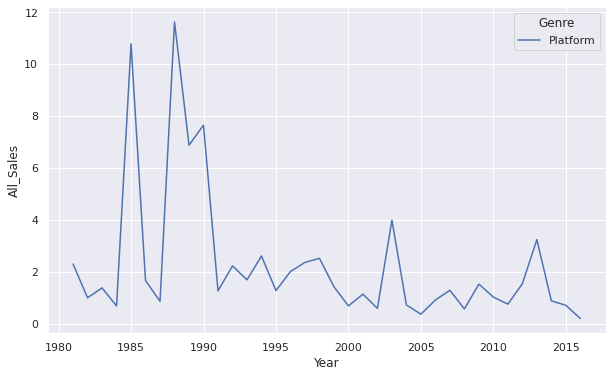

In [221]:
fig = plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.lineplot(data=df, x='Year', y='All_Sales', ci=None,
             hue='Genre', hue_order=['Platform'])
plt.show()

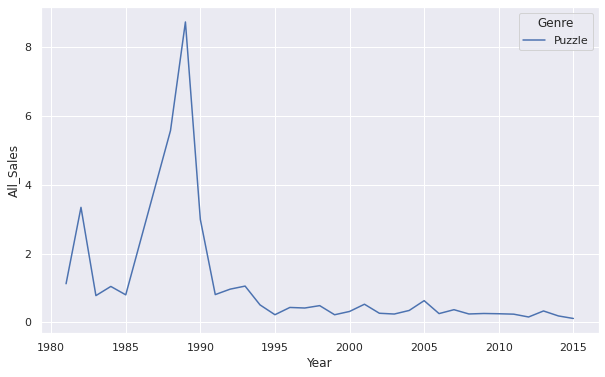

In [222]:
fig = plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.lineplot(data=df, x='Year', y='All_Sales', ci=None,
             hue='Genre', hue_order=['Puzzle'])
plt.show()

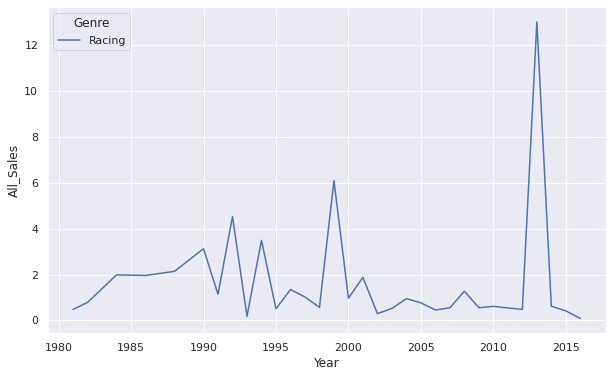

In [223]:
fig = plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.lineplot(data=df, x='Year', y='All_Sales', ci=None,
             hue='Genre', hue_order=['Racing'])
plt.show()

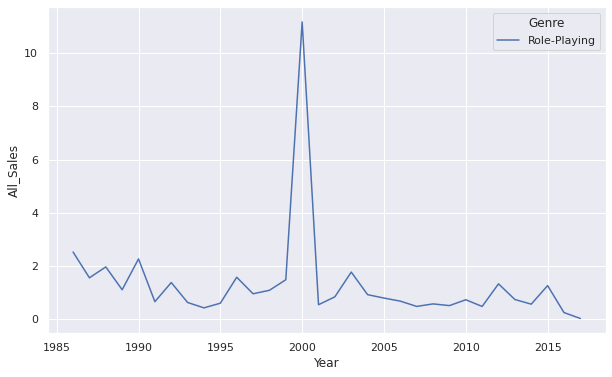

In [224]:
fig = plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.lineplot(data=df, x='Year', y='All_Sales', ci=None,
             hue='Genre', hue_order=['Role-Playing'])
plt.show()

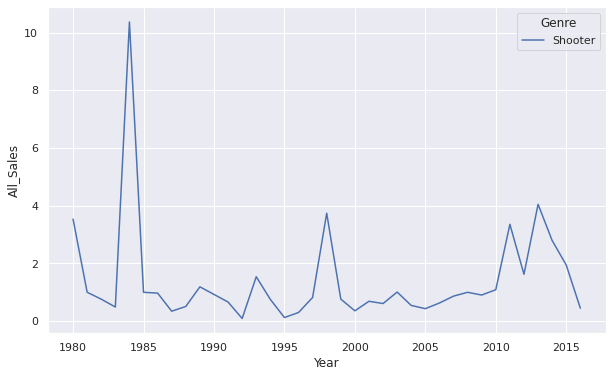

In [226]:
fig = plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.lineplot(data=df, x='Year', y='All_Sales', ci=None,
             hue='Genre', hue_order=['Shooter'])
plt.show()

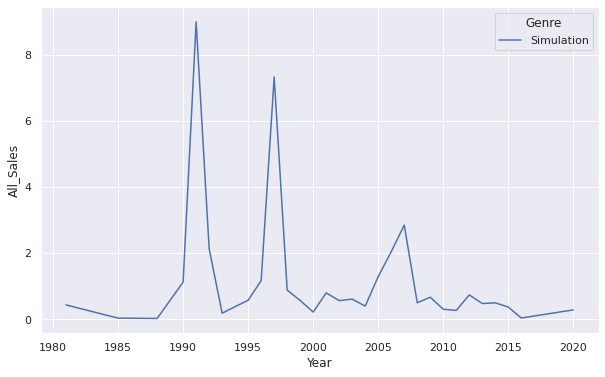

In [227]:
fig = plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.lineplot(data=df, x='Year', y='All_Sales', ci=None,
             hue='Genre', hue_order=['Simulation'])
plt.show()

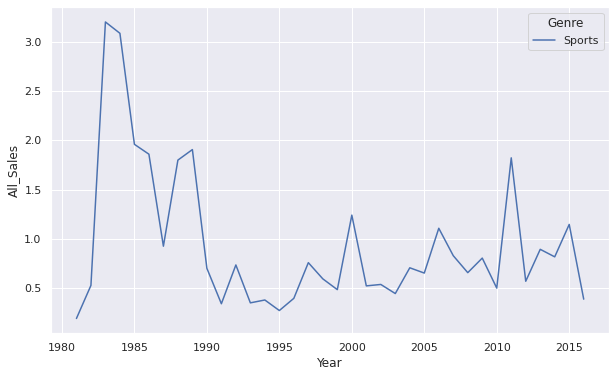

In [228]:
fig = plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.lineplot(data=df, x='Year', y='All_Sales', ci=None,
             hue='Genre', hue_order=['Sports'])
plt.show()

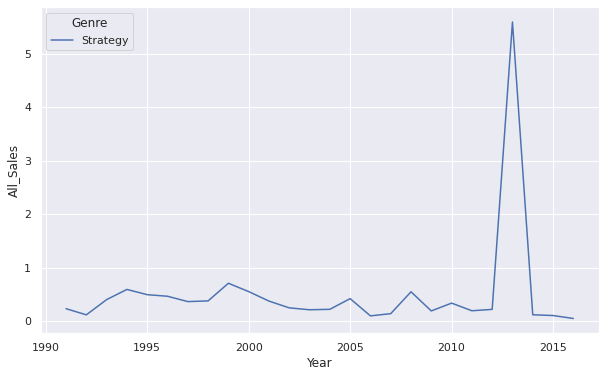

In [229]:
fig = plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.lineplot(data=df, x='Year', y='All_Sales', ci=None,
             hue='Genre', hue_order=['Strategy'])
plt.show()

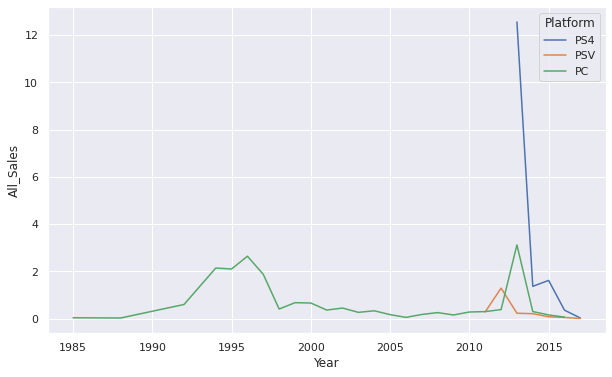

In [230]:
fig = plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.lineplot(data=df, x='Year', y='All_Sales', ci=None,
             hue='Platform', hue_order=['PS4', 'PSV', 'PC'])
plt.show()

게임별 어떤 장르가 많은지 시각화하여 확인

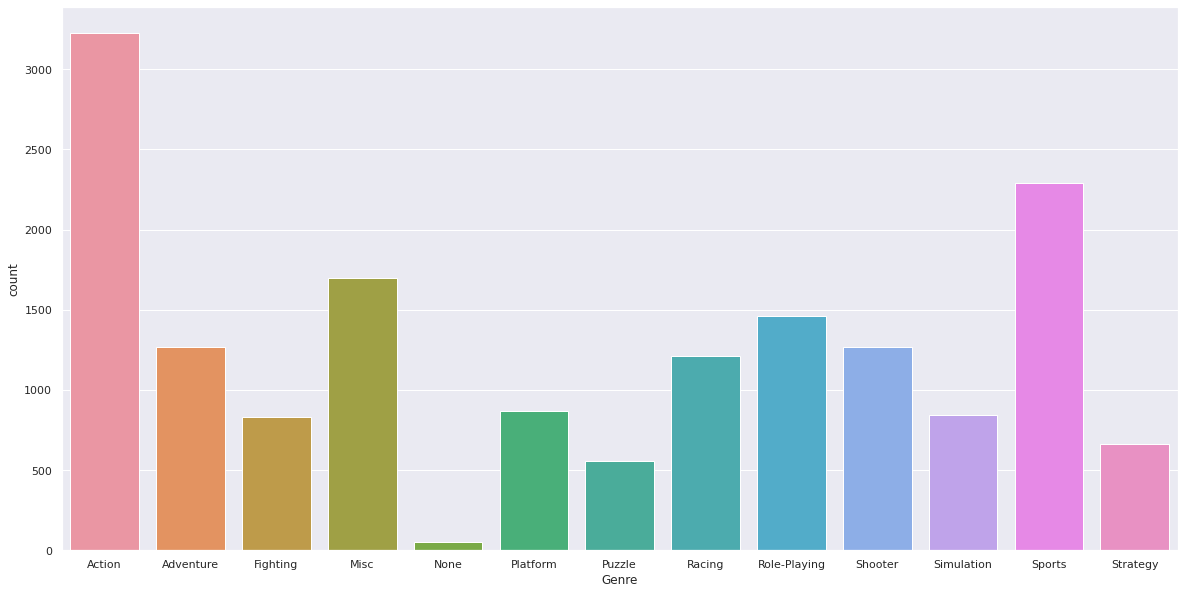

In [142]:
fig = plt.figure(figsize=(20, 10))

sns.countplot(x="Genre", data=df)

In [369]:
df_M = df[df['All_Sales'] > 150] # 총 출고량이 150만장 이상인 게임
df_M.reset_index(drop=True)
df_M.sort_values(by='All_Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
1972,Pokemon X/Pokemon Y,3DS,2013,Misc,Nintendo,517.00,4.05,4.34,0.79,526.18
1965,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,410.00,1.89,1.45,0.16,413.50
9830,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,293.00,1.25,0.83,0.20,295.28
3590,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1.62,0.77,278.00,0.14,280.53
1630,Assassin's Creed III,PS3,2012,Action,Ubisoft,2.64,256.00,0.16,1.14,259.94
13936,Crash Team Racing,PS,1999,Racing,Sony Computer Entertainment,257.00,1.57,0.44,0.21,259.22
8011,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,213.00,0.06,0.69,218.21
11997,Guitar Hero II,X360,2007,Misc,Activision,201.00,0.02,0.00,0.17,201.19
9792,Call of Duty: Ghosts,PS4,2013,Shooter,Activision,178.00,1.42,0.05,0.38,179.85
4979,Cooking Mama 2: Dinner With Friends,DS,2007,Simulation,505 Games,161.00,1.50,0.10,0.39,162.99


In [358]:
df_NA = df[df['NA_Sales'] >50] # 출고량이 50이상인 NA지역 게임
df_NA.reset_index(drop=True)
df_NA.sort_values(by='NA_Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
1972,Pokemon X/Pokemon Y,3DS,2013,Misc,Nintendo,517.0,4.05,4.34,0.79,526.18
1965,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,410.0,1.89,1.45,0.16,413.50
9830,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,293.0,1.25,0.83,0.20,295.28
13936,Crash Team Racing,PS,1999,Racing,Sony Computer Entertainment,257.0,1.57,0.44,0.21,259.22
11997,Guitar Hero II,X360,2007,Misc,Activision,201.0,0.02,0.00,0.17,201.19
9792,Call of Duty: Ghosts,PS4,2013,Shooter,Activision,178.0,1.42,0.05,0.38,179.85
4979,Cooking Mama 2: Dinner With Friends,DS,2007,Simulation,505 Games,161.0,1.50,0.10,0.39,162.99
6930,NBA 2K12,PS3,2011,Sports,Take-Two Interactive,161.0,0.27,0.05,0.18,161.50
4472,Harry Potter and the Chamber of Secrets,GBA,2002,Action,Electronic Arts,121.0,0.64,0.05,0.09,121.78
5297,Forza Motorsport 5,XOne,2013,Racing,Microsoft Game Studios,121.0,0.78,0.01,0.17,121.96


In [346]:
df_EU = df[df['EU_Sales'] >20] # 출고량이 20 이상인 EU지역 게임
df_EU.reset_index(drop=True)
df_EU.sort_values(by='EU_Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
1630,Assassin's Creed III,PS3,2012,Action,Ubisoft,2.64,256.00,0.16,1.14,259.94
8011,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,213.00,0.06,0.69,218.21
5025,WWF SmackDown!,PS,2000,Fighting,THQ,2.01,135.00,0.06,0.16,137.23
14319,Viva Pinata,X360,2006,Simulation,Microsoft Game Studios,0.45,96.00,0.02,0.20,96.67
973,Smarty Pants,Wii,2007,Misc,Electronic Arts,0.53,76.00,0.00,0.16,76.69
2484,Destiny,PS3,2014,Shooter,Activision,0.67,66.00,0.12,0.27,67.06
503,New Super Luigi U,WiiU,2013,Platform,Nintendo,1.27,62.00,0.18,0.16,63.61
14416,Sonic's Ultimate Genesis Collection,PS3,2009,Misc,Sega,1.34,62.00,0.00,0.31,63.65
2014,LEGO Indiana Jones: The Original Adventures,PS3,2008,Action,Activision,0.44,44.00,0.00,0.18,44.62
7688,Top Spin 3,PS3,2008,Action,Take-Two Interactive,0.08,37.00,0.00,0.12,37.20


In [350]:
df_JP = df[df['JP_Sales'] >10] # 출고량이 10 이상인 일본 지역 게임
df_JP.reset_index(drop=True)
df_JP.sort_values(by='JP_Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
3590,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1.62,0.77,278.00,0.14,280.53
9465,Densha De Go!,PS,1997,Simulation,Taito,0.00,0.00,102.00,0.07,102.07
6168,Resident Evil Director's Cut,PS,1996,Action,Virgin Interactive,1.82,1.24,47.00,0.25,50.31
6343,Kirby's Dream Collection: Special Edition,Wii,2012,Action,Nintendo,0.34,0.00,33.00,0.02,33.36
9996,Virtua Racing,GEN,1994,Racing,Sega,0.00,0.00,26.00,0.00,26.00
5672,Summon Night 3,PS2,2003,Role-Playing,Banpresto,0.00,0.00,24.00,0.00,24.00
2319,Castlevania: Symphony of the Night,PS,1997,Platform,Konami Digital Entertainment,0.58,0.40,21.00,0.08,22.06
5584,Digimon World 2,PS,2000,Role-Playing,Namco Bandai Games,0.23,0.16,16.00,4.00,20.39
2401,SimEarth: The Living Planet,SNES,1991,Simulation,Imagineer,0.00,0.00,16.00,0.00,16.00
12507,Kidou Senshi Gundam: Giren no Yabou - Axis no ...,PSP,2008,Strategy,Namco Bandai Games,0.00,0.00,16.00,0.00,16.00


In [373]:
df[df['Genre']=='Platform'].sort_values(by='All_Sales', ascending=False).head() # 출고량이 높은 플랫폼 장르의 대부분은 닌텐도

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
9830,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,293.00,1.25,0.83,0.20,295.28
503,New Super Luigi U,WiiU,2013,Platform,Nintendo,1.27,62.00,0.18,0.16,63.61
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
16579,Gex: Enter the Gecko,PS,1998,Platform,BMG Interactive Entertainment,32.00,0.22,0.00,0.04,32.26
6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


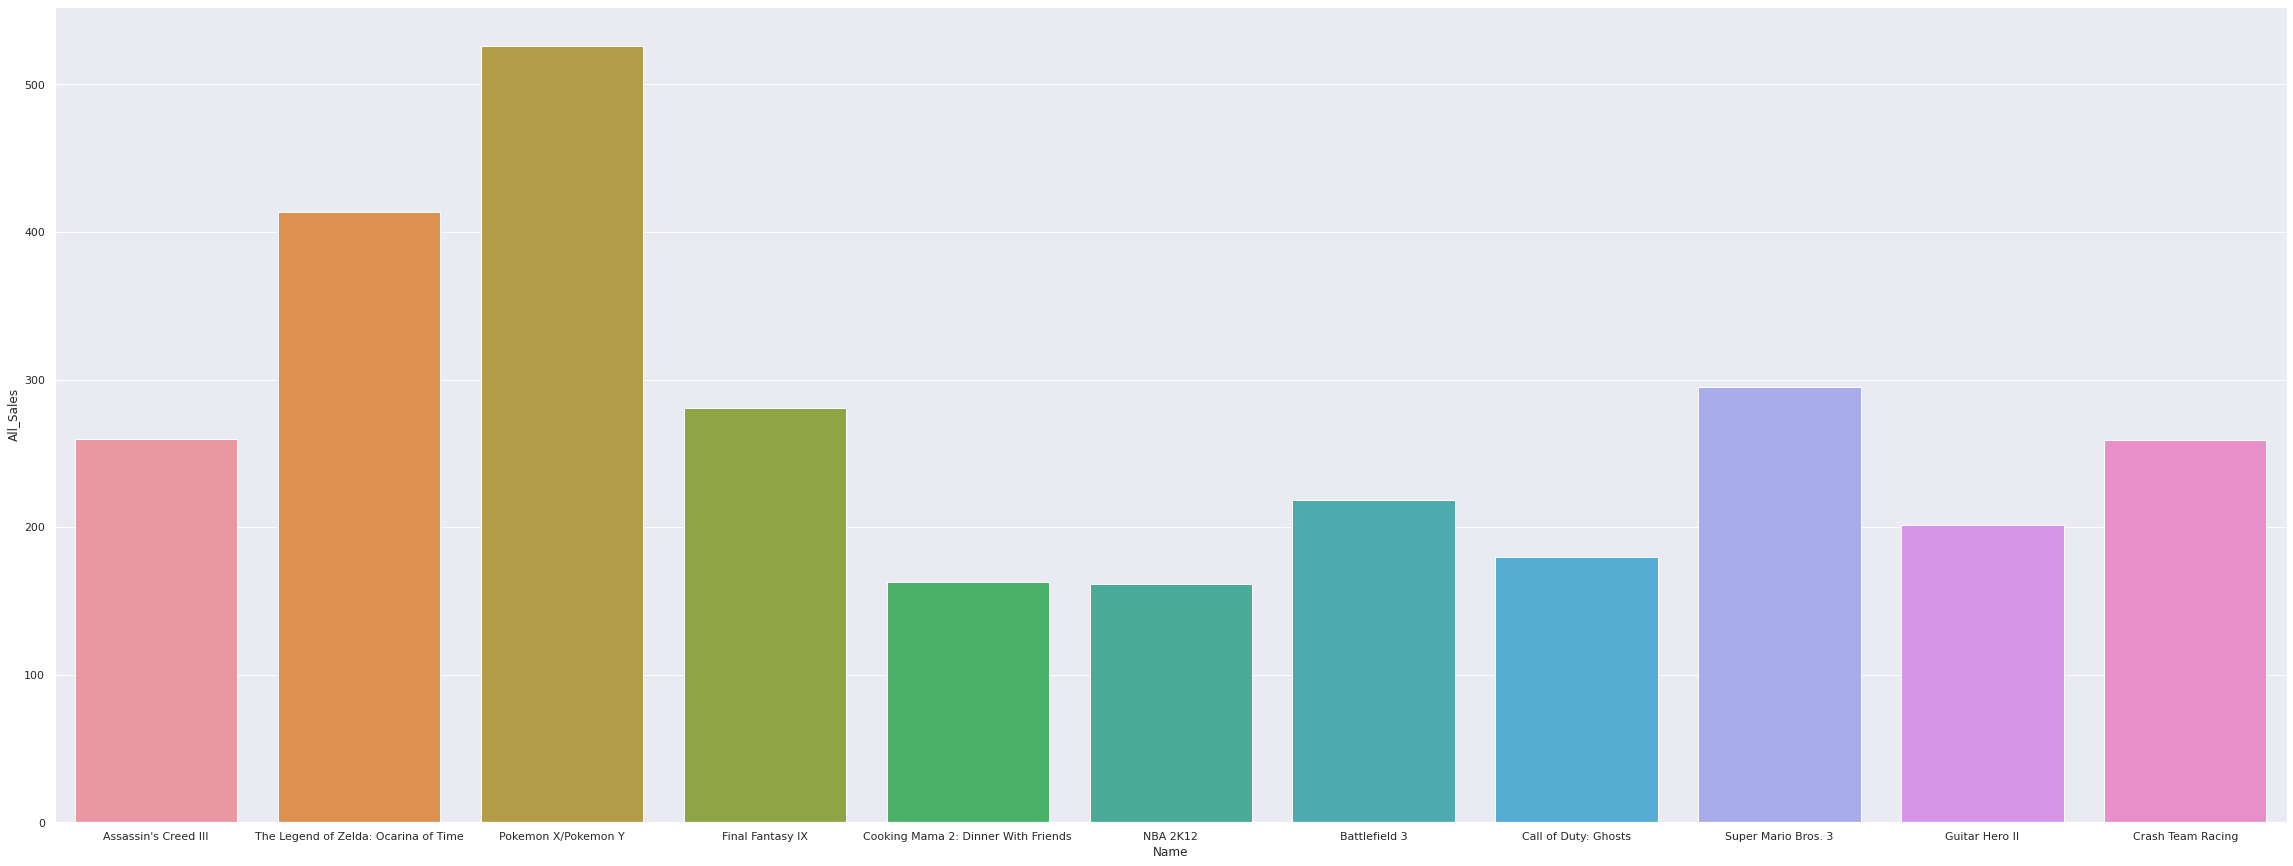

In [363]:
fig = plt.figure(figsize=(40, 15))
sns.set(font_scale=1.5)
sns.set(style='darkgrid')
fig.set_facecolor('white')
sns.barplot(data=df_M, x='Name', y='All_Sales', ci=None,
             )
plt.show() # 150만장 이상 팔린 게임 이름

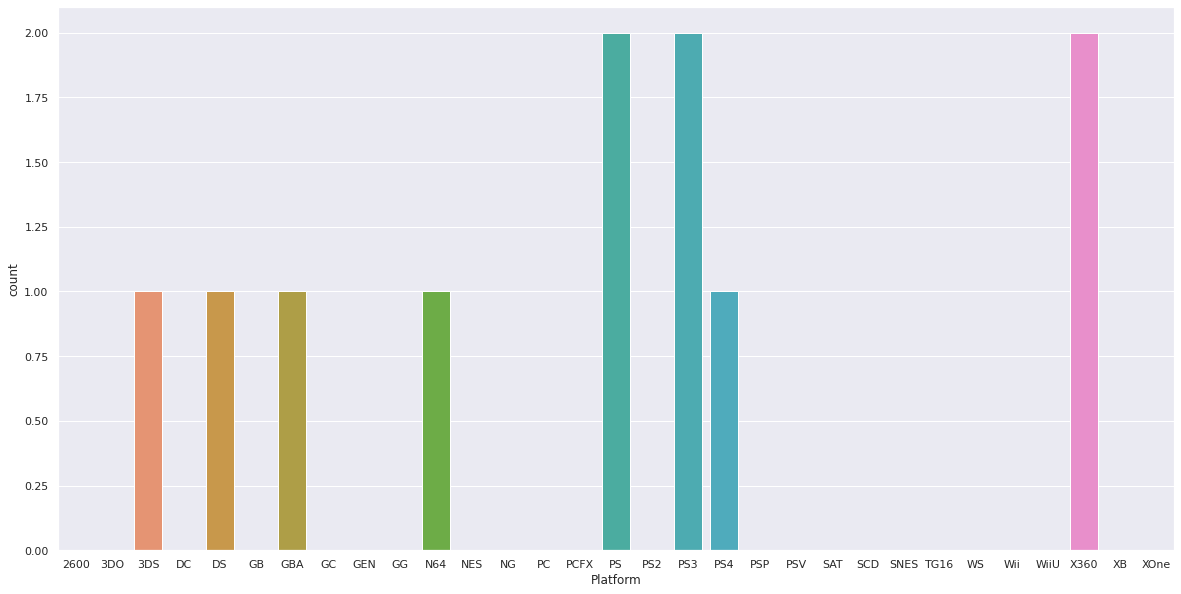

In [371]:
fig = plt.figure(figsize=(20, 10))

sns.countplot(x="Platform", data=df_M) # 150만장 이상 팔린 게임에 대한 플랫폼

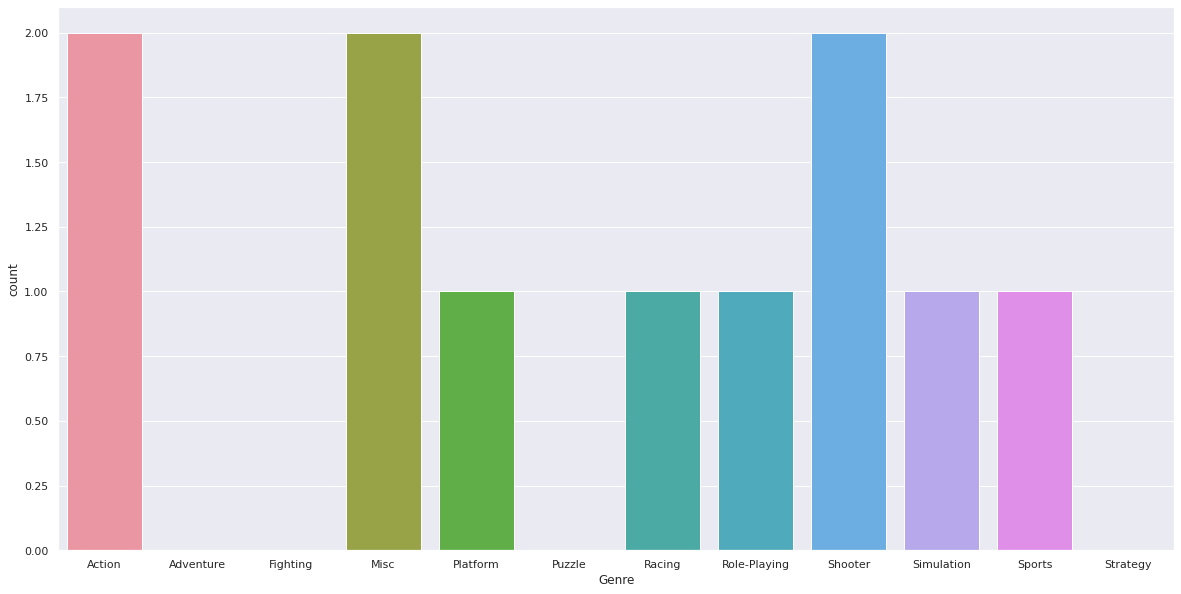

In [364]:
fig = plt.figure(figsize=(20, 10))

sns.countplot(x="Genre", data=df_M) # 판매량이 150만장 이상인 데이터들의 장르 개수

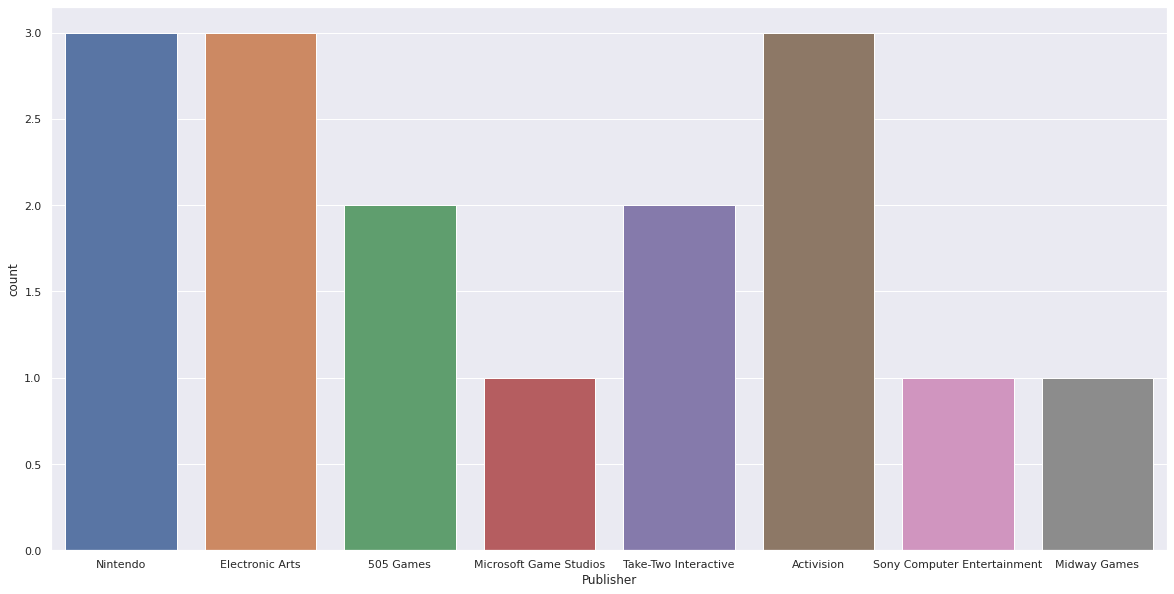

In [360]:
fig = plt.figure(figsize=(20, 10))

sns.countplot(x="Publisher", data=df_NA)

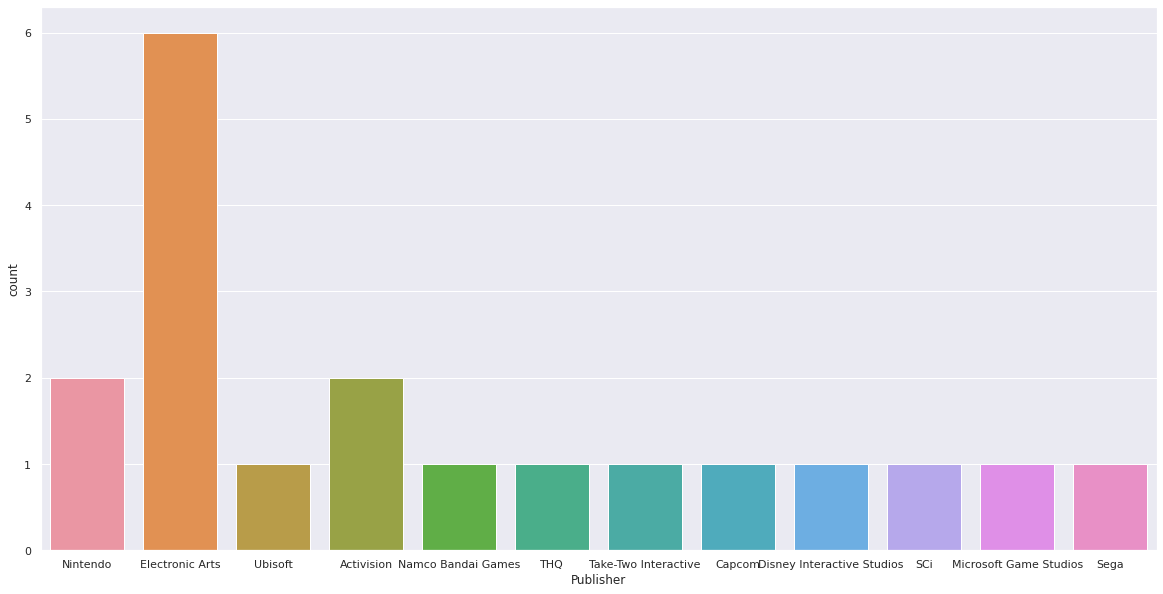

In [347]:
fig = plt.figure(figsize=(20, 10))

sns.countplot(x="Publisher", data=df_EU)

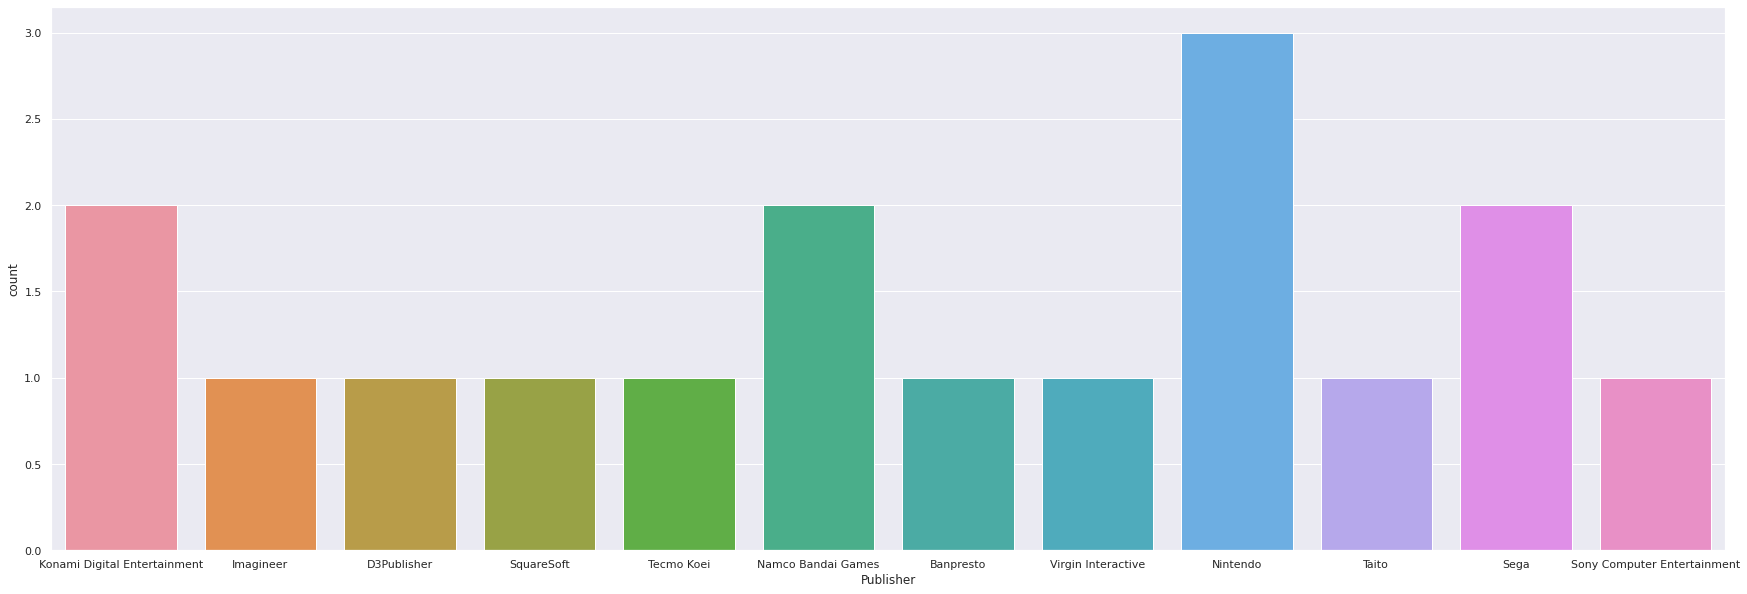

In [352]:
fig = plt.figure(figsize=(30, 10))

sns.countplot(x="Publisher", data=df_JP)

장르별 출고량에 대한 평균 시각화

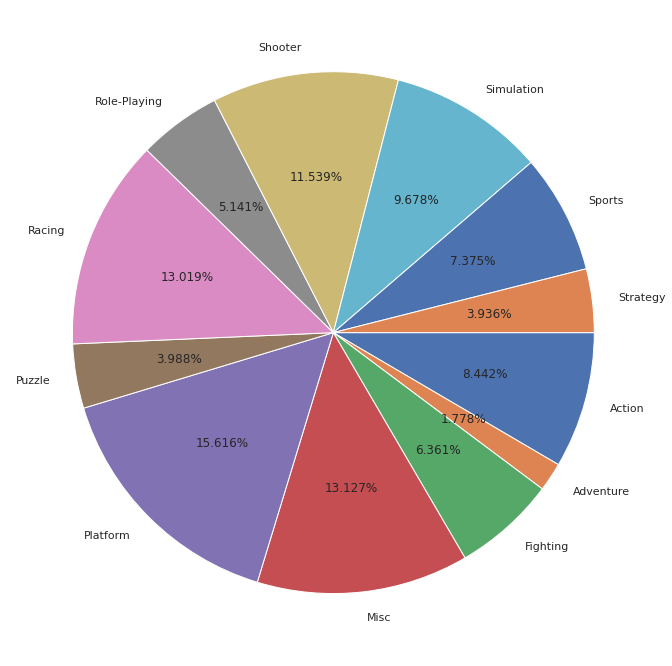

In [322]:
na_mean = df.groupby('Genre')['NA_Sales'].mean()
labels = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']

fig = plt.figure(figsize=(12,12))
plt.pie(na_mean, labels=labels,startangle=0, autopct='%.3f%%', counterclock=False)
plt.show();

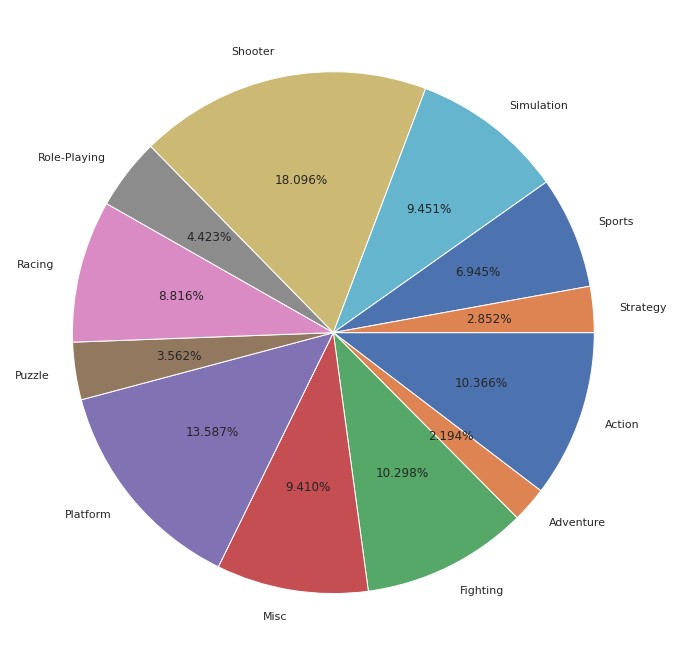

In [343]:
eu_mean = df.groupby('Genre')['EU_Sales'].mean()
labels = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']

fig = plt.figure(figsize=(12,12))
plt.pie(eu_mean, labels=labels,startangle=0, autopct='%.3f%%', counterclock=False)
plt.show();

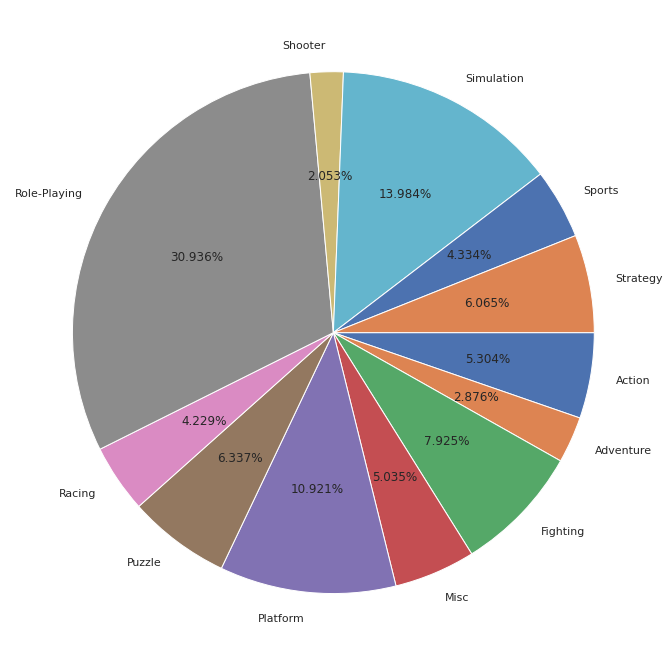

In [348]:
jp_mean = df.groupby('Genre')['JP_Sales'].mean()
labels = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']

fig = plt.figure(figsize=(12,12))
plt.pie(jp_mean, labels=labels,startangle=0, autopct='%.3f%%', counterclock=False)
plt.show();